In [ ]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots appear inline and set a simple default style
%matplotlib inline
sns.set()

pd.set_option("display.max_columns", None)

print("Libraries imported.")

Libraries imported.


### Load

In [ ]:
start_time = time.time()

df = pd.read_csv("Data/Titanic-Dataset.csv")

load_time = time.time() - start_time

print("Shape:", df.shape)
print(f"Data loaded in {load_time:.2f} seconds")
df.head()

Shape: (891, 12)
Data loaded in 0.01 seconds


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Inspection

In [ ]:
start_time = time.time()

print("=== DataFrame Info ===")
df.info()

print("\n=== Numerical Summary (describe) ===")
display(df.describe(include=[np.number]))

print("\n=== Categorical Summary (describe) ===")
display(df.describe(include=["object", "category"]))

inspect_time = time.time() - start_time
print(f"\nInitial inspection time: {inspect_time:.2f} seconds")

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

=== Numerical Summary (describe) ===


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



=== Categorical Summary (describe) ===


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644



Initial inspection time: 0.04 seconds


### Missing value analysis

=== Missing Values per Column ===


,missing_count,missing_pct
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


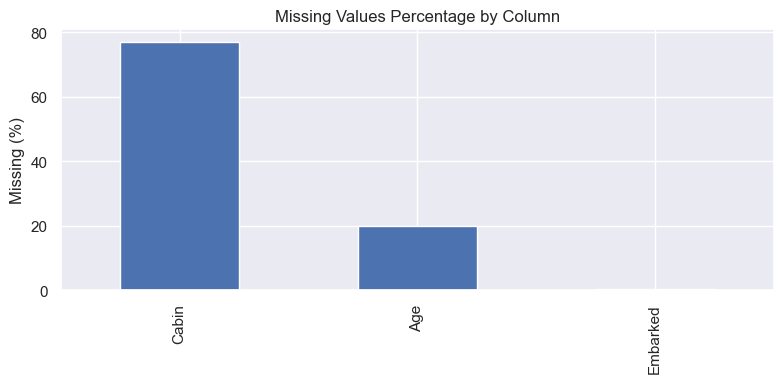

Missingness analysis time: 0.22 seconds


In [ ]:
start_time = time.time()

missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_counts / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct
})

print("=== Missing Values per Column ===")
display(missing_df)

# Simple bar plot of missing percentages
plt.figure(figsize=(8, 4))
missing_pct[missing_pct > 0].plot(kind="bar")
plt.ylabel("Missing (%)")
plt.title("Missing Values Percentage by Column")
plt.tight_layout()
plt.show()

missing_time = time.time() - start_time
print(f"Missingness analysis time: {missing_time:.2f} seconds")

### analysis

=== Survival Counts ===


Survived
0    549
1    342
Name: count, dtype: int64


=== Survival Rate ===


Survived
0    61.62%
1    38.38%
Name: proportion, dtype: object

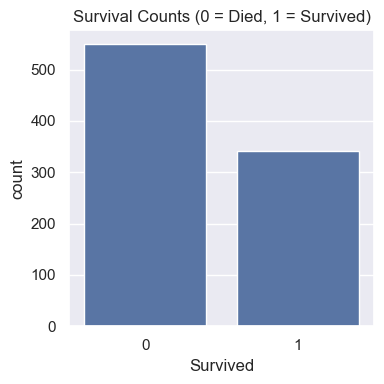

Target distribution analysis time: 0.12 seconds


In [ ]:
start_time = time.time()

surv_counts = df["Survived"].value_counts()
surv_rate = df["Survived"].value_counts(normalize=True)

print("=== Survival Counts ===")
display(surv_counts)
print("\n=== Survival Rate ===")
display((surv_rate * 100).round(2).astype(str) + "%")

plt.figure(figsize=(4, 4))
sns.countplot(data=df, x="Survived")
plt.title("Survival Counts (0 = Died, 1 = Survived)")
plt.tight_layout()
plt.show()

surv_time = time.time() - start_time
print(f"Target distribution analysis time: {surv_time:.2f} seconds")

=== Survival Rate by Sex ===


Sex
female     74.2%
male      18.89%
Name: Survived, dtype: object

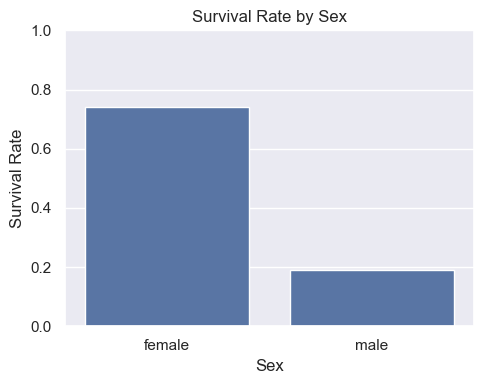

Survival vs sex analysis time: 0.13 seconds


In [9]:
start_time = time.time()

surv_by_sex = df.groupby("Sex")["Survived"].mean().sort_values(ascending=False)
print("=== Survival Rate by Sex ===")
display((surv_by_sex * 100).round(2).astype(str) + "%")

plt.figure(figsize=(5, 4))
sns.barplot(x=surv_by_sex.index, y=surv_by_sex.values)
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Sex")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

sex_time = time.time() - start_time
print(f"Survival vs sex analysis time: {sex_time:.2f} seconds")

=== Survival Rate by Passenger Class ===


Pclass
1    62.96%
2    47.28%
3    24.24%
Name: Survived, dtype: object

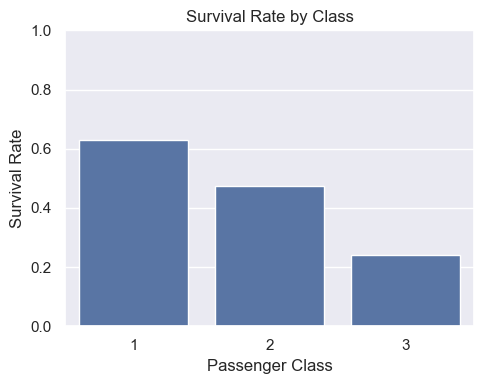

Survival vs class analysis time: 0.12 seconds


In [13]:
start_time = time.time()

surv_by_pclass = df.groupby("Pclass")["Survived"].mean()
print("=== Survival Rate by Passenger Class ===")
display((surv_by_pclass * 100).round(2).astype(str) + "%")

plt.figure(figsize=(5, 4))
sns.barplot(x=surv_by_pclass.index, y=surv_by_pclass.values)
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.title("Survival Rate by Class")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

pclass_time = time.time() - start_time
print(f"Survival vs class analysis time: {pclass_time:.2f} seconds")


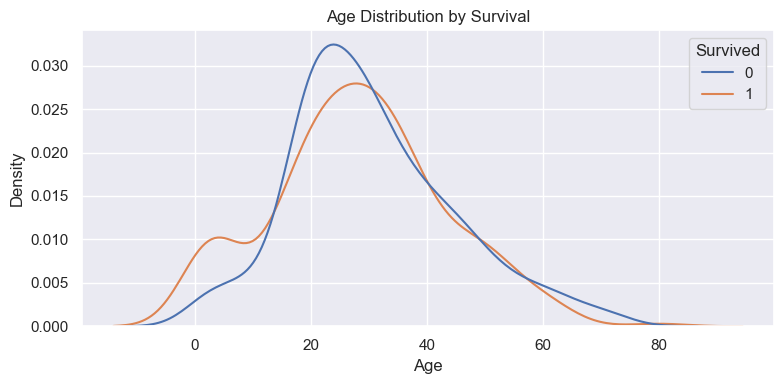

=== Survival Rate by Age Group ===


C:\Users\Kanta\AppData\Local\Temp\ipykernel_41740\3024419231.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_age_group = age_df.groupby("age_group")["Survived"].mean()


age_group
Child         57.35%
Teen          48.89%
YoungAdult    36.89%
Adult         41.61%
Senior        35.62%
Name: Survived, dtype: object

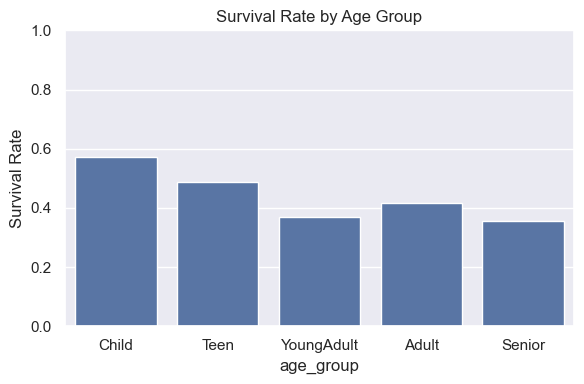

Survival vs age analysis time: 0.47 seconds


In [17]:
start_time = time.time()

# Drop rows without age for this part
age_df = df.dropna(subset=["Age"]).copy()

# Continuous distribution by survival
plt.figure(figsize=(8, 4))
sns.kdeplot(data=age_df, x="Age", hue="Survived", common_norm=False)
plt.title("Age Distribution by Survival")
plt.tight_layout()
plt.show()

# Define age bins
bins = [0, 12, 18, 35, 50, 80]
labels = ["Child", "Teen", "YoungAdult", "Adult", "Senior"]
age_df["age_group"] = pd.cut(age_df["Age"], bins=bins, labels=labels, right=False)

surv_by_age_group = age_df.groupby("age_group")["Survived"].mean()
print("=== Survival Rate by Age Group ===")
display((surv_by_age_group * 100).round(2).astype(str) + "%")

plt.figure(figsize=(6, 4))
sns.barplot(x=surv_by_age_group.index, y=surv_by_age_group.values)
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Age Group")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

age_time = time.time() - start_time
print(f"Survival vs age analysis time: {age_time:.2f} seconds")


### Survival vs embarked

=== Survival Rate by Embarked Port ===


Embarked
C    55.36%
Q    38.96%
S     33.7%
Name: Survived, dtype: object

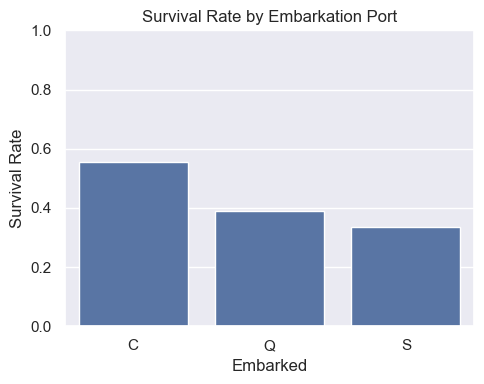


=== Survival Rate by Family Size ===


family_size
1     30.35%
2     55.28%
3     57.84%
4     72.41%
5      20.0%
6     13.64%
7     33.33%
8       0.0%
11      0.0%
Name: Survived, dtype: object

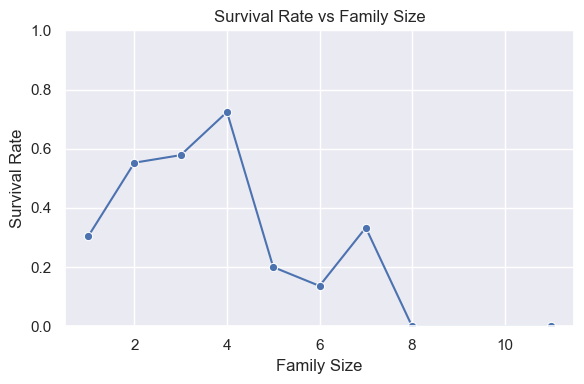

Extra analysis time: 0.25 seconds


In [23]:

start_time = time.time()

# Survival by embarkation port
surv_by_embarked = df.groupby("Embarked")["Survived"].mean()
print("=== Survival Rate by Embarked Port ===")
display((surv_by_embarked * 100).round(2).astype(str) + "%")

plt.figure(figsize=(5, 4))
sns.barplot(x=surv_by_embarked.index.astype(str), y=surv_by_embarked.values)
plt.ylabel("Survival Rate")
plt.xlabel("Embarked")
plt.title("Survival Rate by Embarkation Port")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Create a simple family size feature
df["family_size"] = df["SibSp"] + df["Parch"] + 1

surv_by_fam = df.groupby("family_size")["Survived"].mean()
print("\n=== Survival Rate by Family Size ===")
display((surv_by_fam * 100).round(2).astype(str) + "%")

plt.figure(figsize=(6, 4))
sns.lineplot(x=surv_by_fam.index, y=surv_by_fam.values, marker="o")
plt.ylabel("Survival Rate")
plt.xlabel("Family Size")
plt.title("Survival Rate vs Family Size")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

extra_time = time.time() - start_time
print(f"Extra analysis time: {extra_time:.2f} seconds")